In [18]:
from scipy.stats import norm, rayleigh, poisson
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(norm.cdf(0))
print(norm.cdf(1))
print(norm.cdf(2))
print(norm.cdf(5))
print(norm.cdf(-1))

0.5
0.8413447460685429
0.9772498680518208
0.9999997133484281
0.15865525393145707


In [4]:
print(norm.ppf(0.5))
print(norm.ppf(0.8413447460685429))
print(norm.ppf(norm.cdf(2)))
print(norm.ppf(0.9999997133484281))
print(norm.ppf(0.15866))

0.0
1.0
2.0000000000000004
4.999999999970176
-0.9999803859660787


The above two cells are a check on the cdf and ppf functions of norm. We note two things:
1. The functions are inverses of one another - to within the machine error of my computer, norm.ppf(norm.cdf(x)) = x.
2. The domain of norm.ppf is a probability - that is, some value in [0, 1], and its codomain is a vector on the reals in units of the standard deviation, which tells us to which point we integrate from negative infinity on the normal distribution to obtain the given probability. A negative value for this vector x corresponds simply to integrating from negative infinity to the point |x| to the left of the origin.

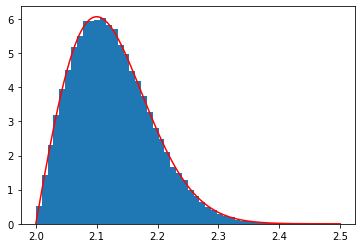

In [5]:
r = rayleigh.rvs(loc = 2, scale = 0.1, size = 10**5)
plt.hist(r, 50, density=True)
x = np.linspace(2, 2.5, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 0.1), 'r')
plt.show()

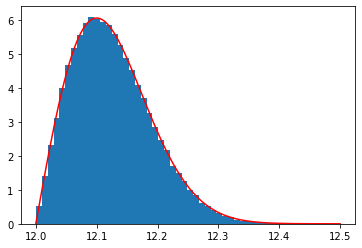

In [6]:
plt.cla()
R = rayleigh.rvs(loc = 12, scale = 0.1, size = 10**5)
plt.hist(R, 50, density=True)
x = np.linspace(12, 12.5, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 12, scale = 0.1), 'r')
plt.show()

From the above we deduce two things: first, the distribution matches excellently to the sample of values from the distribution for sufficiently large sample sizes, and two, the 'loc' parameter fixes the location of the distribution - specifically, it fixes the location of the farthest left value on the distribution.

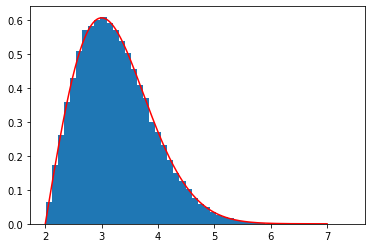

In [7]:
plt.cla()
r = rayleigh.rvs(loc = 2, scale = 1, size = 10**5)
plt.hist(r, 50, density=True)
x = np.linspace(2, 7, 1000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 1), 'r')
plt.show()

Above we returned the loc parameter to its original value and changed the 'scale' parameter - this altered the width of the distribution. Before, when scale = 0.1, the peak was at 2.1 for loc = 2, so that peak - loc = scale, and this relation holds here. We deduce that this is the analogue of our standard deviation from the normal distribution, which entirely defined its width.

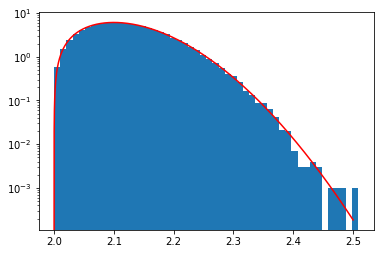

In [8]:
plt.cla()
r = rayleigh.rvs(loc = 2, scale = 0.1, size = 10**5)
plt.hist(r, 50, density=True)
x = np.linspace(2, 2.5, 10000)
plt.plot(x, rayleigh.pdf(x, loc = 2, scale = 0.1), 'r')
plt.yscale('log')
plt.show()

Now, suppose we had data whihc is suspected to be signal free and follow a Rayleigh distribution, with parameters loc = 0, scale = 1, and suppose additonally we have already normalized our data. Then, suppose we take a measurement from this data and return a value of 5. The question we then seek to answer is:
    What is the probability the background gives me a data point that looks as or more signal like than the data point I 
    have? For this probability, what sigma away from the mean would this probability correspond to on a Gaussian 
    distribution?

We convert this to an integral in the following manner: first, we normalize the distribution (already done here by assumption). We then note the probability of a measurement occurring in a certain range is the integral of the distribution over this range. A more "signal-like" measurement here occurs to a measurement greater than our measurement, so the likelihood of the measurement occuring is an integral from our data point (x = 5) to infinity. In other words, P(better signal) = integral of the Rayleigh distribution from 5 to infinity. We calculate this simply enough: rayleigh.cdf(x) integrates the distribution from negative infinity to x, and since the distribution is normalized, we have that the integral of it over the whole real line is 1, so if we denote by R(x) the Rayleigh distribution, and by int(R(x))(a, b) the integral of R(x) from a to b, then we get our desired probability is P = int(R(x))(5, infinity) = 1 - int(R(x))(-infinity, 5) = 1 - rayleigh.cdf(5).

In [9]:
print(1 - rayleigh.cdf(5))

3.7266531720536733e-06


We then want the sigma that would correspond to this probability on a Gaussian distribution, which we calculate with the normal norm.ppf(x) - but note norm.ppf is odd, so we just use the regular cdf value to get a positive answer. 

In [10]:
print(norm.ppf(rayleigh.cdf(5)))

4.4803146987717914


We then get that the sigma of this result is to a good approximation 4.48. However, immediately the general case suggests itself: the probability as calculated above for some measurement other x will be 1 - rayleigh.cdf(x), assuming x positive, and vanishing otherwise, as the pdf of the Rayleigh distribution is 0 on the negative numbers. We graph this function to see the variance with position at a glance.

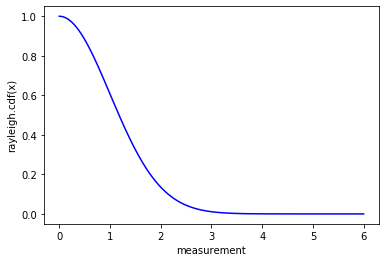

In [13]:
plt.cla()
x = np.linspace(0, 6, 10000)
plt.plot(x, 1 - rayleigh.cdf(x), 'b')
plt.xlabel("measurement")
plt.ylabel("rayleigh.cdf(x)")
plt.show()

We can also find the sigma of this measurement, which is again obviously in the general case norm.ppf(rayleigh.cdf(x)).

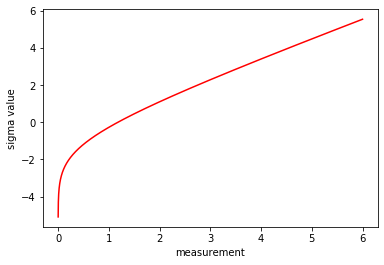

In [17]:
plt.cla()
x = np.linspace(0, 6, 10000)
plt.plot(x, norm.ppf(rayleigh.cdf(x)), 'r')
plt.xlabel("measurement")
plt.ylabel("sigma value")
plt.show()

In short, the farther to the right we go, the lower the probability of getting data which is more signal-like than the background drops off very fast, and the sigma of measurement values is rapidly growing for small measurement values, and approximately linear in the measurement for larger values. That settled, we now look to the Poisson distribution.

The Poisson distribution has one parameter, lambda.

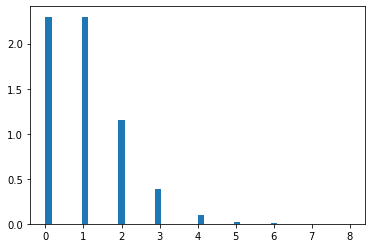

In [28]:
plt.cla()
p = poisson.rvs(1, size = 100000)
plt.hist(p, 50, density = True)
plt.show()

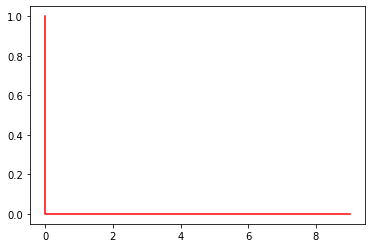

In [35]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 0), 'r')
plt.show()

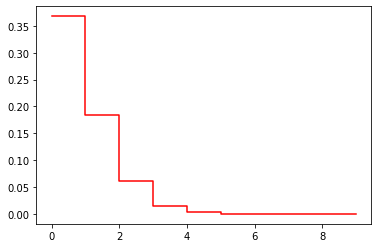

In [32]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 1), 'r')
plt.show()

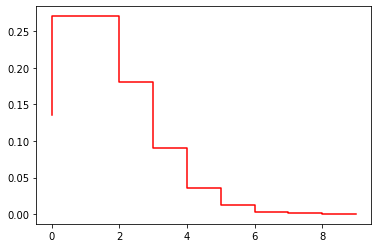

In [33]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 2), 'r')
plt.show()

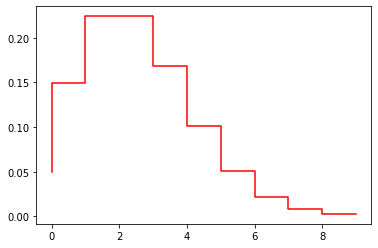

In [36]:
plt.cla()
x = range(10)
plt.step(x, poisson.pmf(x, 3), 'r')
plt.show()

Increasing lambda "drags" the center of the distribution about; it in effect describes the center of the distribution. We can then take a measurement on this distribution, and say it returns value x. We may ask what is the probability that the background gives a data point that is as or more signal-like than x, and we may also ask what sigma on a Gaussian corresponds to this measurement.

The distribution is normalized, so the likelihood of seeing a more signal-like event from this background is the integral of the distribution from the data point up to infinity. We arbitrarily fix a lambda - say, 2.4 - and look at the graph of the integral from x to infinity of the distribution, which by normalization is equivalent to 1 - poisson.cdf(x, 2.4).

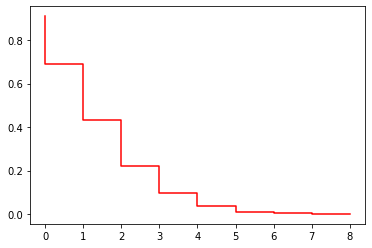

In [37]:
plt.cla()
x = range(9)
plt.step(x, 1 - poisson.cdf(x, 2.4), 'r')
plt.show()

We also want our sigma, and we just feed our probability from above into the norm.ppf() function - but again, this function satisfies norm.ppf(1 - x) = - norm.ppf(x), and we want our sigma to be nonnegative, so we take norm.ppf(poisson.cdf(x, 2.4)) to be our sigma.

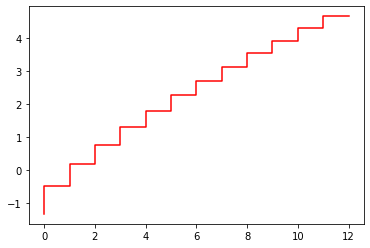

In [40]:
plt.cla()
x = range(13)
plt.step(x, norm.ppf(poisson.cdf(x, 2.4)), 'r')
plt.show()

The probability of getting more signal-like events than x is a quickly falling function of x, which appears to go like x^{-1}. The sigma of measurement x, meanwhile, appears to go roughly linearly in x. The fact that these probabilities and sigmas are discrete is a problem for the final draft. I mean just remember

The discretization of the distribution does not require our lambda be discrete, as it is in reality the limit of the average over measurements' postions as the number of measurements goes to infinity. There is no reason why an average of integers is an integer, and it is often not - consider the average of 1 and 0. By careful summing, any real can be found as the limit of such a sum.